In [2]:
name = "Md Asaduzzaman Shahin"
id = "48225320"

# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [8]:
#import all libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### 1. ***Explore the data*** and ***clean the data if necessary***

In [7]:
# Load the dataset
df = pd.read_csv('Mobile_Price_Data.csv')
print(df.head())

   battery_power   blue   clock_speed   dual_sim   fc   four_g   int_memory   \
0             842      0           2.2          0    1        0           7    
1            1021      1           0.5          1    0        1          53    
2             563      1           0.5          1    2        1          41    
3             615      1           2.5          0    0        0          10    
4            1821      1           1.2          0   13        1          44    

   m_dep   mobile_wt   n_cores   ...  px_height   px_width   ram   sc_h   \
0    0.6          188         2  ...          20       756   2549      9   
1    0.7          136         3  ...         905      1988   2631     17   
2    0.9          145         5  ...        1263      1716   2603     11   
3    0.8          131         6  ...        1216      1786   2769     16   
4    0.6          141         2  ...        1208      1212   1411      8   

   sc_w   talk_time   three_g  touch_screen   wifi   price_ran

In [9]:
# Data Exploration and Cleaning
print(df.isna().sum())
print(df.describe())

# Handle missing values
df = df.fillna(df.mean())  # replace missing values with the mean of the column

# Remove abnormal instances
df = df[df['battery_power'] < 2500]

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64
       battery_power       blue   clock_speed     dual_sim           fc   \
count     2000.000000  2000.0000   2000.000000  2000.000000  2000.000000   
mean      1238.518500     0.4950      1.522250     0.509500     4.309500   
std        439.418206     0.5001      0.816004     0.500035     4.341444   
min        501.000000     0.0000      0.500000     0.000000     0.000000   
25%        851.750000     0.0000      0.700000     0.000000     1.000000   
50%       1226.000000     0.0000      1.500000     1.000000     3.000000   
75%       1615.250000     1.0000   

TypeError: Could not convert ['         7         53         41         10         44         22         10         24         53          9          9         33         33         17         52         46         13         23         49         19         39         13         47         38          8         57         51         41         52         21          5         33         41         51         22         60         61          6         11         50         44         41          5         34         20         27         42         40         57         64         14         63         43         16         51         46         60         61         49         48         12         63         50                     9         44         36         30         10         43         45         22          9         43         38         42          9         33         16         29         58         64         45         61         57         25         42         64          3         33         57         54         15         14          7          7         23         60         37         31         10         12         57         55          8         39         23         42         46         41         43         32          4          7         22         18         53         40         46         15         10         10         52         36         25         16         58         25         31         19         54          2         41         30         36         16         22         46          3         14         31         14         43         33         64          9         31         40         47         41         56         56         61         32         45         46         60          6         29         34         37         51         14         26          3         33         27         10         58         44         32          8         10         42         16         25         29         23         22         63         30         41         38         20         54          4          5         46          6         43         46          7         64         57         20         23         41         61         26         36         22         20         16         30         61         47          8         49         51         35         23         41         63         39         50         53         49         17         24         51         29         40         13         25         38         17         49         31         37         24         39          9         31         27          6         11         42          6         38         49         49         44         51         10         37         50         23         48          7         30         55         63         63          7         19         57          4         32         51          6         59         25         56         28         18         57         40         38         47         28          7          4         45          3         30         62         61          8          2         39         36         40         54          6         56         27         16         24         26         42         63         16          9         48         34         56         12         52         56         38         58         57         56         12         29         52         37          8         42         40         44         41         50         41         49         49         64         14         42         64          5         29         64         63         18         25         21         26         27         13         20          9         20          7         47         18         47         48         36         22         54          2         17         37          6         52         10          3         57         42         44          2         33          8         19         64         17         50         62         61         21         57         32         21         36          2          9         34         46         52         52         36         55         58         42         30         26         14         19         46          8         48         59         54         33         18         44         23         12         63         26         39         23          9         57          7         57         33         28         42          7         50         19         55         13         34         45         17         34         51          5         44         48         49         25         51         54         63         54          4          7         57         43         11         48         56         47         24         20         28         17         64         57         17         23         50         13         36          3          8         57         11          3         26          3         28         64         62         51         51         35         54         34         25         64         48         41         53         28         44         43          6         51         13         40         42         37          4         18         61         48         16         45         60         22          2         61         26         15         58         56         34          3         43         27         41          2         27         20         48         17         31         17         50         15         39          5         31         33         34         54         32          6         32         29         19         23         15         59         44         50         10          7         45          9          2         12         61         57         19         55         46         14         51         23         26         54         27         61         12         38          8         30         17         16         31         37         49         53         51         16         38         39         21         16         19         50         31          7         35         45         41         43         45         21         26         53         32         30         13         61         14         13          3         38         32         30         52         50         34          8         32         46         55         24         20          6         24         23         23         19         18         24          5          5         58         29         40         40         17         35         39         64         55         54         58         25         11          3         11         40         44         12          7         28         56         20         35         16         46         56          4         30         24         21         44         34         39         16         21          5         36          2         30         48         54         30         34         58         35         21         26         19         54          9         15          9         27         43         47         14          3         31         46          3         14         60         25         53         35         64         15         25         35         54          7         14         45         50         50         36         21         46         61         26         33         44         48         11          3         27         62         32         32         45         22         64         13         12         60         12         34         41         27         31         25         60         19         41         57         26         52         38         23         33         57         43         22         17         19          2         62         48         39         20         30         50         49         35         21         25         20         28          2          9         11          6          3         49         37         52          8         61         54         51         45         58          7         21         43          2         49         42         61         13         25         57         42         34         15         35         37          8         18         58         16         43         17          4         45         53         16          5         51         45         63         11         12         34         58         39         49         56         14         15          7         16         27         30         25         64         23         27         50         45         63         18         58          8         11         11         50         50         14         47         56         55         42          2         55         46         24         38         53         25         56         10         41          8         22         20          3         52          6         19          5         21         10         10         44         33          8         25         16         54         52         64          8         48         57         61         30         14         52         25          7          2         33          4         27         43         31         55          9         21         33         63         11         30         48         39         35         34         16         51         55         32         16         38         16         63         58         41          8         10         52         56         21         29          6         15         35         14         35         11         34         15          8          2         32          9          9          4         64         11         13         34         48         53         18         47         21         30         22         39          6         31         50          3         36          8         40         58         61         32         49         49          8         34         12         46         27         26         53         45         17         27         53         45         30         12         10         23         53         36         49         14         35          5         60         30         58          8         63         48         29         38         13         55         13         27         27         44          9         23          7         34         13         54         46         39         33         52          7          8         46         50         42         13         41         13         46         38         54         47         57          6         52         36         33          7         61          7         55          8         19         34         13         46         38         14         52         52         30         54         47         23         58         59         47         34         58         44         19         11         51         20         21         45         11         19         48         27          3         43         49         10         19         29         20         28         57         50         46         53         58         13         34         31         51         19          6         53         53         33         52         54         28         63         64         23         59         61         58         55         49         53         37          4         38         18         43         12         41         57         13         57         60         28         46         14         63         52         18         39         63          5         30          7         22         21         35         37          3         27         19         64         33         18         16         32         28         51         18         17         42         23         23         45         27         41         60         31          8         62         10         39         59         24         23         14         40         33         37         14         55         30         55          4         18         30         58         58         62          2         10         35         35         61         60         14         32         57         12         55         47         18         46         45         43         35         59         57         36         64         22         44         58         63         46         16         35         41         12          9         54         50         16          5         52         31         62         10         55          9         14          8         60         10         55         43         24         56         31         51          2         14         12         32         44         46         35          2         38         20         49         61         50         21         40         28         29         59         16         40         42         27          9         44         51         15         51         57         18          3         47         14         11         30          7         24          2         13         62         40          9         56         62         39         52         11         10         37         27         60          2         34         49         26         58         32         35         45         57         41         22         50         20         51          5         58          2         24         11         32         56         29         57         51          9         24          5         27         37         56          6         35         55         64         16         20         10         36         61         62         40         55         32          4         39          7         35         24         50         59         47         21         20         29         54         41         43         31         49         52          6         13         52         49          7         60         20         27         12         39         13          7          4         19         54         42         31         25         12         46          6          8         37         23         58         12          6         10         15         12          9         19         49         28         58         46         60         31         36         59         56         44         42          2         52          6         19          5         33         58         30         42         26          6          5         44         23          6         27         41         32         59         17          5         17         13         29         20         27         42         47         17         22         39         60         29         16         24         14         47         34          5         36         12         16         58         44         10         42         42         51         18          7         14         14         26         14          2         42         31         63          9         40         57         31         28         27         42         12         39         11         14         62         51         23         15          6         40         52         32         63         24         49         57         62         33         56         50         10          2         29         52         17         63         52         42         14         28          6         30         28         26         14         29         35         13         55         18         27         40         21         60         63         33         54         14         30         15         10         32         15          2         50         44         58         19          6         34         59          6         19         37          9         10         41         44         27         14         24         32         40         18         16         31         22         13         64         53         27         13          5          6         11         44         50         55         12         31         50         22         57         44         33         42         11         31         10         44         28         20         33         40         10         33         40         20         11         63         10         29          5          2         39         44         54         12         40         31         50          9         21         22          3         36          8         12          2         29         48         26         20         40         20         64         43         60         15         21         60          4          8         36         11         23         48         35          3         34         14         27         20         42         14         22         60         24         33         57         38         50          8         60         12         30         55         58          9         59         38         11          6         57         16         19         30          5         18         30         44         40         15         20         27         15         45         39         23         55         18         36         42         43         28         54          2         26         14         50         28         23         39         12         16         14          3         27         34         16         43         56         42         12         49         24         15         54         19         19         22         46          2         26         31         35         11         36          7         62          7         42         30          5          8         53         59         35         27         24         39          5         27         17         33         21         58         44         15          6         37         40         24         39         41         52         48         15         17         41         62         38         58         11         16         56         30         34         20         47         44         28         62          4         47          8          2         41         57         14          5         45          5         59         33         63          7          5         50         11         40         57         62         27         16         42         61         10         13          4         20         61         16         18         46          2         42         54         57          9         25         26         32         23         51         17         45         49         37          7         41         49         62          5         24         35          4         33         17         52         12         53         33         48         26         20         45         36         33         20         27          2         35         54         21         29         42         56         47         14         49          7          7          2          5         28         27          9         30         44         27          8         21         15         26         21         24         20          5         17         19         11         48          5         52         24         12         32         26         21         42         28         59         52         45         57         28         21         50         44         10         43         35         57         26         56         27         44         23         46         40         22         44         16         32         23         63          8         48         64         12          7         30         19         16         11         16         47         64         23         29         28         26         34         47         23         51         54         11         15         64         47         53         64          8         12         20         60         11         16         37         47          2         60         53         58         30         27         55         38          6         63         16         19          5         51         58         31         34         17         53         26         57         56          2          5         48         60         26         17         41         21         37         12         45         14         24         42         52         44         35         14          6          7         16         62         61         59         49         60          2         30         19         14         60          9         19         25          7         29         19         54         53         44         20         22         24         17         55          3         27         39          5         53          2         64         53          2         27         16         10         28         42          2         52         12          8         15         56         32         15         62         46         30         11         63         36         21         13          9         47         45         18         38         11         45          2         35         13         41         63         39         18         62         10         23         45         16         41         45         37         12         14         40         63         33         35         32         33         30          2          8         21         40         37         49          4         16         21          7          6          7         21         32          6         25         64         27         23         18         64         36         24         17          5         45         24         27         61         16         55         40          3         14         42         21          6         29         25         46          9         33         27         10         18         53          9          4          6         41         34         37         59         58         13         57         15         36         44         21         18         50          2         39         36         46         45 '
 '  0.6   0.7   0.9   0.8   0.6   0.7   0.8   0.8   0.7   0.1   0.1   0.5   0.6   1     0.7   0.7   0.1   0.1   0.6   1           1     0.3   0.7   0.4   0.6   0.3   1     0.3   0.4   0.2   1     0.9   0.6   0.7   0.4   0.6   0.5   0.3   0.3   0.6   0.2   0.2   0.1   0.8   0.2   1     0.8   0.2   0.8   0.7   0.8   0.3   0.3   0.5   0.6   0.5   0.4   0.5   1     0.6   0.8   0.8   0.5   0.7   0.8   0.3   0.5   0.6   0.8   0.8   0.7   0.1   0.7   0.5   0.9   0.4   0.6   0.2   0.7   0.9   0.2   0.9   1     0.8   0.8   0.5   0.8   0.1   0.5   0.5   1     0.4   0.7   0.8   1     0.2   0.2   0.7   0.4   0.3   0.8   0.7   0.6   0.5   0.7   1     0.1   0.3   0.1   1     0.5   0.7   1     0.6   0.2   0.3   0.9   0.9   0.5   0.3   0.5   0.9   0.8   0.8   0.6   0.3   0.5   0.6   0.1   0.8   0.1   1     0.2   0.7   0.5   0.9   0.5   0.3   0.1   0.1   0.5   0.3   0.5   0.9   0.4   0.2   0.5   0.4   0.8   0.1   0.2   0.9   0.7   0.7   0.9   0.8   0.4   0.5   0.7   0.6   0.3   0.5   0.5   0.1   0.8   0.9   0.4   0.2   0.3   0.5   0.1   0.2   0.3   1     0.8   0.8   0.1   0.1   0.4   0.3   0.2   0.1   1     0.2   0.8   0.1   0.1   0.5   0.9   0.6   0.2   0.3   0.2   0.1   0.2   0.8   0.7   0.3   0.4   0.6   0.4   0.3   0.7   0.1   0.3   0.3   0.7   0.1   0.4   0.1   0.1   0.5   0.5   0.4   1     0.2   0.2   0.4   0.1   0.5   0.5   0.5   0.9   0.1   0.2   0.1   0.6   0.1   0.3   0.8   0.4   0.5   0.1   0.8   0.1   0.1   0.1   1     0.4   0.1   0.5   0.3   0.6   0.4   0.2   0.4   0.4   0.8   0.7   0.6   0.1   1     0.2   0.6   0.2   0.1   0.5   0.5   0.5   0.7   0.2   0.6   0.7   0.8   1     0.3   0.4   0.9   0.3   0.9   0.1   0.3   0.6   0.9   0.5   0.8   0.3   0.8   0.4   1     0.9   0.5   0.5   0.1   0.7   0.3   0.2   0.8   0.6   0.2   0.1   0.8   0.6   0.3   0.7   0.3   0.9   0.7   0.1   0.6   0.6   0.1   0.9   0.4   0.3   0.5   0.6   0.8   0.5   0.5   0.8   0.5   0.7   0.6   0.9   0.8   0.4   0.3   0.2   0.6   0.8   0.9   1     0.9   0.4   0.4   0.2   0.5   0.4   0.8   0.1   0.1   0.6   0.2   0.3   0.9   0.3   0.8   0.8   0.1   0.3   0.1   0.7   0.3   0.7   0.2   0.7   0.6   0.4   0.3   0.1   1     0.5   0.8   0.9   0.9   0.5   0.3   0.3   0.9   0.9   0.8   0.8   0.3   0.5   0.4   0.8   0.7   1     0.1   0.2   0.7   0.5   0.6   0.4   0.1   0.4   0.4   0.4   0.9   0.2   0.1   0.7   0.2   0.7   0.2   1     0.6   0.5   0.1   0.2   0.6   0.9   0.3   0.4   0.9   0.7   0.2   0.2   0.2   0.8   0.6   0.1   0.2   0.7   0.1   0.7   0.7   0.6   0.2   0.5   0.7   0.6   0.8   0.3   0.3   0.2   0.2   0.8   0.4   0.3   0.2   0.4   0.1   0.4   0.3   0.1   0.5   0.8   0.2   0.7   0.4   0.7   0.8   0.3   0.8   0.5   0.6   0.7   0.9   0.3   0.3   1     0.1   0.4   0.9   0.3   0.8   0.7   0.2   0.7   0.8   1     0.7   0.7   0.1   0.4   0.9   0.1   0.4   0.7   0.1   1     0.6   0.8   0.9   0.7   0.1   0.3   0.7   0.1   1     0.7   0.8   0.6   0.8   0.3   0.1   0.1   0.9   0.1   0.3   0.7   0.2   0.3   0.7   0.3   0.8   0.6   0.3   1     0.2   0.8   0.1   0.6   1     0.8   0.4   0.1   0.1   0.6   1     0.6   0.3   0.7   0.2   0.9   0.7   0.7   0.6   0.9   0.5   0.9   0.9   0.6   0.8   0.1   0.1   1     0.7   0.9   0.5   0.3   0.1   0.1   0.5   0.1   0.1   0.3   0.7   0.1   0.9   0.5   1     0.4   0.9   0.6   0.2   0.5   0.1   0.6   0.1   1     0.1   0.2   0.8   0.2   0.9   0.5   0.9   0.5   0.1   0.1   0.2   0.8   0.3   0.7   0.3   0.9   0.1   0.8   0.6   0.1   0.1   0.1   0.4   0.8   0.1   0.1   0.8   0.1   0.9   0.9   0.3   0.1   0.7   0.8   0.1   0.4   0.9   0.1   0.3   0.2   0.1   0.1   0.2   0.6   0.9   0.7   0.6   0.7   0.3   0.6   0.1   0.6   0.1   0.1   0.9   0.1   0.4   0.7   0.3   0.8   0.8   0.3   0.1   0.9   0.9   0.3   0.1   0.2   0.2   0.5   0.1   0.5   0.5   0.4   0.1   0.7   1     0.1   0.6   0.5   0.8   0.3   0.2   0.2   0.5   0.6   0.7   0.8   0.2   0.8   0.5   0.5   0.3   0.3   0.9   0.3   0.8   0.1   0.9   0.8   0.1   0.6   0.7   0.9   0.6   0.1   0.8   0.3   0.2   0.2   0.4   0.5   0.7   1     0.2   0.2   0.3   0.5   0.7   0.9   0.7   0.5   0.5   0.8   0.7   0.2   0.5   0.7   0.2   0.8   0.3   0.1   0.9   1     0.5   0.9   0.9   0.3   0.9   0.9   0.1   0.8   0.1   0.9   0.1   0.9   0.1   0.1   0.4   0.8   0.4   0.3   0.4   0.5   0.7   1     0.1   0.7   0.7   0.1   0.6   0.7   0.7   0.4   0.6   0.8   0.6   0.5   0.4   0.3   0.6   0.5   0.7   0.2   0.7   0.9   0.5   0.1   0.1   0.1   0.3   0.3   0.2   0.3   0.7   0.4   0.3   0.8   0.8   0.6   0.3   1     0.6   0.6   0.2   0.1   0.2   0.7   0.2   0.5   0.8   0.7   0.8   0.9   0.2   0.8   0.3   0.5   0.9   0.4   0.8   0.1   0.3   0.1   0.2   0.2   0.3   0.8   0.6   0.7   0.4   0.2   0.5   0.3   0.2   0.3   0.6   0.1   0.1   0.8   0.3   0.7   0.9   0.7   0.4   0.2   0.6   0.2   0.1   0.2   0.4   0.6   0.9   0.7   0.2   0.3   0.1   0.7   0.3   0.8   0.6   0.7   0.3   0.6   0.4   0.8   0.8   0.1   1     0.6   1     0.4   0.2   0.6   0.7   0.7   0.9   0.3   0.3   0.9   0.3   0.1   0.1   0.1   0.2   0.1   0.5   0.5   0.4   0.7   0.8   0.9   0.3   0.9   1     0.9   0.5   0.5   0.7   0.1   0.6   1     0.7   0.6   0.5   0.6   0.8   0.8   0.5   0.6   0.4   0.9   0.6   0.7   0.4   0.1   0.8   0.2   0.8   0.9   0.5   0.1   0.5   0.8   0.6   0.1   0.4   0.8   0.7   0.7   0.2   0.8   0.5   0.1   0.1   0.3   0.1   0.8   0.8   0.2   0.5   0.1   0.2   0.5   0.2   0.1   0.7   0.2   0.9   0.3   0.1   0.9   0.5   0.7   0.9   0.8   0.1   1     0.3   0.6   0.7   0.5   0.8   0.4   0.4   0.9   0.4   0.3   0.4   0.3   0.2   0.2   0.6   0.3   0.4   0.8   0.6   0.9   0.5   0.2   0.4   0.5   0.9   0.4   0.5   0.4   0.7   1     0.5   0.8   0.2   1     0.1   0.4   0.1   0.9   0.1   0.2   0.1   0.7   0.5   0.9   0.6   1     0.2   0.4   0.1   0.3   0.1   0.1   0.2   0.3   0.1   0.2   0.5   0.6   0.3   0.7   0.4   0.4   1     0.1   0.1   1     1     0.2   0.7   0.1   0.8   0.5   1     0.3   0.6   0.5   0.5   0.1   0.2   0.9   0.8   0.9   0.9   0.4   0.5   0.1   0.3   0.8   0.4   0.2   0.5   0.3   0.2   0.5   0.9   0.2   0.4   0.4   0.6   0.5   0.1   0.3   0.9   0.2   0.5   0.9   0.9   0.6   0.1   0.5   0.1   0.3   1     0.5   0.3   0.1   0.4   0.3   0.9   0.1   0.7   1     0.9   0.5   0.1   0.5   0.7   0.2   0.4   0.5   0.3   0.2   0.1   1     0.2   0.2   0.1   0.3   0.3   1     0.9   0.1   0.3   0.9   0.8   0.4   0.6   0.9   0.7   0.6   0.2   0.2   0.8   0.7   0.5   0.8   0.2   0.1   0.8   0.3   0.4   0.1   0.4   0.1   1     0.9   0.2   0.8   0.1   0.2   0.6   0.7   0.7   0.1   0.7   0.2   0.5   0.6   0.1   0.8   0.6   0.5   0.6   0.2   0.4   0.9   0.9   0.1   0.2   0.9   0.6   0.7   0.7   0.1   0.4   0.9   0.1   0.9   0.7   0.8   0.1   0.9   1     0.1   0.8   0.1   0.9   0.1   0.3   0.7   0.1   0.1   0.7   0.7   0.4   0.1   0.8   0.8   0.8   0.7   0.3   0.4   0.2   0.5   0.2   0.3   0.9   0.8   0.6   0.1   0.4   0.9   0.1   0.7   0.3   0.2   0.9   0.1   0.9   0.7   0.6   0.8   0.2   0.5   0.7   0.1   0.2   0.5   0.6   1     0.4   0.8   1     0.6   0.9   0.9   1     0.1   0.8   0.2   0.6   0.3   0.8   0.5   0.3   0.9   0.1   0.5   0.2   0.6   0.1   0.8   0.7   0.9   0.1   0.3   0.2   0.3   0.1   0.3   0.2   0.7   0.4   0.3   0.5   0.1   0.4   0.6   0.1   0.9   0.1   0.7   0.8   0.9   0.3   0.1   0.6   0.7   0.5   0.1   0.7   0.9   0.8   0.6   0.1   0.5   0.3   0.1   0.3   0.5   0.6   0.7   1     0.3   0.1   0.8   0.4   0.7   0.9   0.4   0.7   1     0.7   0.2   0.7   0.6   0.9   0.8   0.4   0.4   0.1   0.1   0.9   0.4   0.7   0.4   0.6   0.1   0.4   0.6   0.3   0.3   0.3   0.3   0.5   0.1   0.5   0.1   0.6   0.4   0.6   1     0.8   0.8   0.3   0.5   0.6   0.4   0.3   0.5   0.5   0.6   0.9   0.1   0.7   0.6   0.2   0.1   0.8   0.8   0.9   0.2   0.2   0.7   0.7   0.3   0.9   0.4   0.9   0.8   0.8   0.2   0.6   0.9   0.5   0.2   0.1   0.4   0.7   0.2   0.1   0.3   0.3   0.8   0.3   0.7   0.2   0.5   0.4   0.6   0.3   0.1   0.7   0.3   1     0.1   0.1   0.1   0.9   0.8   0.8   0.4   0.8   0.2   0.6   0.7   0.5   0.1   0.7   0.8   0.5   0.1   0.6   0.7   0.9   0.1   0.2   0.8   0.2   0.5   0.8   0.5   0.4   0.9   0.1   0.1   0.7   0.1   0.5   0.2   0.2   0.4   0.2   0.9   0.6   0.4   0.1   0.1   0.5   0.8   0.8   0.8   0.9   0.1   0.3   0.8   0.1   0.4   0.8   0.6   0.8   0.9   0.6   0.4   0.7   0.1   0.5   0.1   0.2   0.4   0.7   0.5   0.1   0.8   0.9   0.1   0.4   0.2   0.8   0.8   0.1   0.1   0.4   0.6   0.5   0.3   0.5   0.7   0.2   0.4   0.1   0.2   0.9   0.2   0.4   0.3   0.3   0.9   0.6   0.6   0.8   0.9   1     0.2   0.2   0.1   0.1   0.1   1     0.1   0.3   0.3   0.7   0.8   0.5   0.7   0.5   1     0.6   0.3   0.6   0.4   0.1   0.4   0.2   0.7   0.6   0.3   0.6   0.1   0.1   0.7   0.9   0.6   0.8   0.4   0.6   0.4   0.5   0.2   0.5   0.7   1     0.2   0.7   0.5   0.3   0.8   0.4   0.3   0.5   0.1   0.8   0.3   0.7   0.4   0.7   0.9   0.8   0.5   0.6   0.1   0.6   0.1   0.9   0.7   0.2   0.4   0.4   0.4   0.9   0.7   1     0.1   0.1   0.1   0.5   0.8   0.6   0.1   0.9   0.4   0.9   0.2   0.2   0.4   0.2   0.1   0.7   0.1   0.8   0.1   0.5   0.7   1     0.8   0.4   0.6   0.5   0.7   0.7   0.1   0.5   0.3   0.9   0.4   0.5   0.9   0.1   1     0.4   0.1   0.5   0.8   0.3   0.2   0.1   0.5   0.2   0.9   0.4   0.9   0.2   0.4   0.1   0.7   0.9   0.8   0.1   0.6   0.6   0.7   0.5   0.8   0.8   0.9   0.1   1     0.6   0.6   0.2   0.8   0.8   0.8   0.2   0.4   0.8   0.7   0.4   0.2   1     0.1   0.5   0.7   0.9   0.9   0.3   0.5   1     1     0.1   0.1   0.8   0.9   0.6   0.3   0.2   0.1   0.5   0.7   0.1   0.5   0.6   0.9   0.1   0.7   0.6   0.9   0.7   0.9   0.3   0.3   0.1   0.8   0.3   0.6   0.1   0.6   0.3   0.1   0.3   0.7   0.1   0.1   1     0.6   0.1   0.7   0.9   0.9   0.7   0.1   0.3   0.6   0.1   0.1   0.7   0.5   0.1   0.2   0.2   0.5   0.9   0.4   0.2   0.5   0.6   0.3   0.7   0.2   0.5   0.2   0.2   0.1   0.1   0.2   1     0.7   0.2   0.1   0.1   1     0.8   1     0.3   0.1   1     0.9   0.2   0.8   0.5   0.5   0.8   0.8   0.5   0.5   0.8   0.8   1     0.9   0.1   0.7   0.6   0.2   0.5   0.1   1     0.6   0.2   0.3   0.8   0.2   0.3   0.5   1     1     1     0.2   0.3   0.2   0.6   0.1   0.2   0.6   0.1   0.6   0.9   0.8   0.9   0.4   0.8   0.3   0.7   0.9   0.4   0.1   0.9   0.1   0.6   0.2   0.1   0.7   0.3   0.3   1     0.2   0.4   0.3   0.9   0.5   0.4   0.6   0.5   0.4   0.5   0.3   0.9   0.7   0.7   0.4   0.6   0.5   0.1   0.3   0.9   0.1   0.5   0.6   0.4   0.2   0.6   0.8   0.8   0.2   0.6   0.7   0.6   0.3   0.4   1     0.2   0.1   0.9   0.1   0.9   0.1   0.1   0.1   1     0.5   0.9   0.9   0.8   0.1   0.8   0.5   0.6   0.7   0.6   0.1   0.1   0.5   0.5   0.8   0.3   0.2   0.2   0.8   0.5   0.7   0.5   0.1   0.2   0.1   0.1   0.5   0.2   0.7   0.1   0.6   0.5   0.9   0.2   0.3   0.4   0.5   0.4   0.3   0.3   0.7   0.1   0.6   1     0.9   0.4   0.9   0.9   0.2   0.1   1     0.3   0.7   0.9   0.5   0.5   0.3   0.6   0.9   0.4   0.9   0.2   0.5   0.4   0.9   0.4   0.6   1     0.4   0.6   1     0.9   0.4   0.6   0.2   0.2   0.8   0.3   0.1   0.1   0.3   0.1   0.8   0.7   0.6   0.4   0.5   0.2   0.1   0.1   0.4   0.1   0.5   0.1   1     0.2   0.9   0.7   0.3   0.4   0.3   0.4   0.1   0.8   0.7   0.3   0.1   0.8   0.8   0.7   0.9   0.6   0.8   0.5   0.2   0.8   0.6   0.3   0.1   0.2   0.6   0.1   0.6   0.9   0.7   1     0.9   0.9   0.8   0.6   0.5   0.2   0.5   0.7   0.5   0.2   1     0.8   0.8   0.9   0.5   0.9   0.4   1     0.4   0.3   0.6   0.9   0.9   0.8   0.5   0.5   0.1   0.6   0.1   1     0.1   0.1   0.6   0.1   0.8   0.3   0.2   0.7   0.9   0.6   0.2   1     0.9   0.4   0.9   0.7   1     0.8   1     0.2   0.1   0.5   0.6   0.6   0.5   0.4   0.2   0.3   0.2   0.5   0.6   0.6   0.1   0.9   0.3   0.5   0.7   0.2   0.8   0.3   0.7   1     0.1   0.4   0.4   0.4   0.6   0.3   0.5   0.2   0.7   0.8   0.3   0.3   0.7   0.5   0.7   0.2   0.8   0.4   0.2   1     0.5   0.8   0.5   0.6   0.2   0.1   0.9   0.2   0.8   1     0.5   0.2   0.1   1     0.2   0.6   0.1   0.2   0.7   0.9   0.6   0.6   0.3   0.8   0.1   0.3   0.1   1     0.2   0.7   0.1   0.9   0.4   0.4   0.1   0.9   0.1   0.5   0.1   0.4   0.2   0.8   0.8   0.2   0.6   0.1   0.8   0.2   0.7   0.1   0.9 '
 '     756     1988     1716     1786     1212     1654     1018               836     1224      874     1005      748     1440      563     1864     1850      810      878     1064     1854     1385      822      788     1245     1434      645     1075     1311     1263     1739      654     1152     1919      881     1249      815     1307      730     1613      967     1932      714     1456     1652     1810     1791      774     1433     1854     1832     1383      629     1287      804     1036     1449      820      713      683      969      975      547     1353     1570     1618     1858     1781     1225      603     1724     1217     1026      638     1413     1242     1071      778     1552     1486     1206     1616     1752     1122     1049     1894      741     1118     1203     1402     1924     1242      802     1105     1990     1179      891     1684      961     1317     1739      881      984      520      902     1504     1634     1796     1846     1869     1471      874     1974      513     1244     1661      973      771      989     1954     1338     1712      863     1376     1203      902      786     1965     1732     1398      829      792      580     1056     1264     1248      669     1686     1539     1042     1926      616     1131     1697      536      786     1269     1298     1967     1025      800     1359     1996     1013      590     1925     1989      826     1983     1545     1533      621     1272     1729     1071      974     1554     1611     1937     1942      845      627      842     1737     1199     1740      648     1136     1220      879     1065      831     1191     1631      588      500     1698     1299      898     1381      984     1533     1464      539     1179      751     1497     1215     1948     1542     1235     1345      589     1182     1052     1429      873      836     1478     1460      705     1666     1077     1020     1235     1516     1499      583     1958     1995      642     1178     1404     1040     1453     1677      517     1560     1226     1200     1647     1308     1615      687      637     1606     1543      980     1441     1383     1009     1754      860     1543     1108      673     1758      886     1485     1038      946     1462      654     1604     1882     1816      765     1398     1980     1559     1928     1529      952     1517     1741     1596     1564     1222      692     1617     1571     1247     1767      714     1935     1933     1509      954      662      888      527      820     1493     1929      764     1092     1891     1699      683     1664      763      572     1963     1489     1294      997      655     1458     1243      519     1767      566      515     1168      882     1942      776      564     1975     1212     1118     1388     1462     1130      754     1726     1876      709      557     1914      775     1910     1923     1370      994     1078      724     1104     1182     1795     1224     1442     1023     1361      652      935     1345     1292     1256     1364     1786     1429      682     1199     1688     1898     1438     1463     1584     1059     1253     1442      939      986     1029     1280      898     1381     1565     1299     1726     1331     1922     1038      992     1186     1920     1866      981     1195     1706      749     1711      681     1974     1510      814     1025     1247     1814     1233      642      721     1670      550      699     1138     1903      817     1126     1139      926     1506      726     1753      794     1161     1350      619      660     1468     1705     1476     1666     1026     1033     1529      559      973     1223      956     1797      882      596      574      990     1053      858      758     1495     1104     1352     1304     1205      562      585     1441     1075     1629     1975     1798      545     1657     1341      817     1058     1203     1744      740     1133      889     1719     1285     1850     1905     1158     1325      772     1743      882     1208     1050     1366      899     1224     1131     1884     1370     1497      867      681      884     1358      998     1989      862     1785      799      793      695      728     1940     1304     1078     1259      790     1594      548     1256     1911     1649     1264     1262     1972     1484     1090     1259     1439      592     1777      870     1106      948     1393      982     1586     1579      644     1157      539      750     1472     1337     1663      861      773     1313     1849     1613     1259     1151     1807     1763     1029      952      654     1827     1916     1924     1580     1942     1582     1234      517     1917     1759      939     1463      848     1803      915     1354     1143      632      899     1642     1450     1463     1013     1587     1665     1815      739      963     1508     1000      544     1627      759     1416     1088     1596      760      857     1100      676      658     1239     1901     1813     1578     1878     1864     1109     1171     1949     1722     1920     1809      964     1237     1082      828     1241      545     1710     1793     1463     1100     1951     1704     1897      809     1306     1771     1536     1509     1545     1987     1022     1337      522     1883     1787      910      781     1501     1176     1285      583      684     1838      904     1552     1854      559     1682     1383      655     1715      906      637     1230     1315      599     1302      727     1787     1096     1173      816     1970     1101     1654     1191     1089     1033     1781      901     1701     1308     1232      630     1184     1991     1256     1917      510     1511     1813      747     1947      935     1421     1652      672     1031      527      739     1596      575     1364     1478     1282     1353     1435     1651      516     1000     1754     1703     1935     1898     1832      721     1048     1873     1465     1477     1748     1383     1159     1630      857     1293     1162     1747      736     1418      757     1750      549      818      974      938     1505     1116      991      577     1374     1251     1747     1674      800     1016     1327      501     1621      858     1532     1294      810      811     1318     1655     1702     1013     1883     1862     1301     1605      718      699     1742     1558      766     1799     1658     1666     1998     1491     1891     1262      650      907     1234      519     1595      895     1589     1564     1384     1611     1733     1634      922     1291      874     1089     1604     1162     1648      910      723      999     1300      819     1238      643     1633      735     1226     1339     1445     1424      883     1452      806      849     1812      947     1605     1916     1895     1123     1409     1484     1005     1675     1724     1958     1930     1518     1704      589      859      821     1671     1865      822     1018      829      522     1009     1564     1448      896      605     1056     1330      670     1909     1185     1008     1642     1668     1482     1229      823     1326      932      926     1641      660     1051     1889     1982      893     1163      589      962      697     1312     1862     1469      952      704      671     1583      809     1151      791     1391     1336     1638      690     1073      643     1660     1395      783     1208      799     1145     1169      563     1360     1423     1152     1577     1181     1228     1523      867      774     1513      812      580      783      662     1081      697     1406     1001     1995     1500      530      832     1026      672     1267      670      928     1897     1382     1011     1929     1076      688     1403      734     1234     1159     1968     1165     1481     1569     1554     1876     1793     1367     1125     1913     1203      828     1155      618     1545      670      563     1293     1084     1723      831     1933     1980     1469     1514      937     1119     1556     1263     1819     1638     1435     1394     1197     1108     1956     1026      614      516     1334      806     1230      687      558      507     1670      765     1190     1744     1248      714     1973     1670      506      736     1019      674     1409     1420      774     1377     1517     1663     1538      511      541      940     1666     1659     1330      983      772     1366     1219      507     1735     1291      719     1915      917      730     1808     1908     1977     1452     1972      930     1190     1968     1165     1877     1997      671     1284      974     1759     1465      760      661     1304      698     1143     1782     1445     1261     1902     1782     1667     1040     1960     1394     1591     1910      890      864     1994      823     1552     1463     1910     1392      510     1427     1731      875     1348      616     1263      635      622     1767      653     1716      570     1813     1356     1553     1985     1471      705     1208      906      663     1916     1976     1761     1520      915     1768     1096      631      843      519     1152     1810     1682      739     1005      676     1595     1623     1178      772     1964     1413     1963     1795     1801     1992     1649      571     1746     1903     1055      893      877     1088      830     1805      541     1781      722      646     1309     1758     1079     1087      982     1191     1361     1055     1767     1626     1661      521     1247     1564     1515      822     1638      932      710     1883     1401     1383     1791     1432     1300     1090     1262     1637     1068      755      874     1531     1348      656     1434     1292     1983     1623      869     1555     1827      772     1764     1046      594     1896     1320     1687     1069     1170     1595     1347     1324      966     1538      846     1389      574      607     1636      709      882     1781     1305     1433     1352     1966     1178     1500     1212      989     1602     1263      728     1607     1490      550     1762     1455      556     1737     1229     1606     1239      734     1264      864     1014      500     1411      525     1967     1377     1843      652      797     1043     1418      565      887      656      874     1352     1195      751      639     1804     1920     1581      912      745      511     1011     1278     1344     1291      896     1892     1247      684     1109     1247      773     1019      645     1788     1422     1558     1858     1767      618     1037     1554      759      571     1469      551     1579     1838     1841      876     1079      620      747     1012      522     1499      768      740      807     1089      507      804     1335     1544     1378     1378     1923     1702      739     1796     1456     1884      707      898     1609      603     1723     1593     1988     1057     1032     1951     1473     1477     1106      741     1656     1134      922      627     1385     1145     1756      711     1899      679     1252     1387     1886     1477     1930      860     1539     1144      613      909     1743     1469      544      873      947     1389      798      519     1676     1651     1147     1011     1688     1613     1469     1738     1838     1261     1362     1461      819     1062      997      598      564     1316     1746     1694     1783     1524     1728     1678      828     1622      979     1052     1958     1310     1504      970     1931     1858     1528      791     1614     1409     1437     1472     1418     1004     1683     1892     1744     1163      621     1383      784     1066     1400     1766      846     1662     1520     1923     1773      501     1274      986      676      974     1309      888      794     1454     1654     1084     1210     1306     1206      603      952     1878     1285      568     1206      533      696     1850      640     1496     1378     1552      887     1769      855     1167     1386     1284     1517      627     1836     1356      941     1793     1269     1039     1182      884     1162      613      518     1195     1591     1345      764     1226     1552     1233     1827      865     1133      644     1156      967     1970      530     1781     1553     1227     1393     1893     1076      891     1273     1393      686     1708     1804     1376     1073     1340      581     1796     1709     1981      831     1267     1915     1681     1728     1156     1062      507     1039     1079      682     1007     1027     1527      935     1873     1619     1163     1144     1925      941      694     1496      870     1103     1301     1299     1713      910     1759     1250      850     1435     1923     1448     1877     1132     1957     1492     1473     1316      991      903      646      588      540     1004      730      855      512     1098     1717     1193     1657     1639      620     1431      724     1880     1591      925     1506      627     1723     1363     1134     1803     1897     1564      977     1648      978     1551     1857     1988     1873      676     1240      563      800     1021      727     1284     1987      519      703      675      925     1724     1945     1331     1802      679     1105     1327     1010     1364      892      884      679      636     1407     1567     1684      584      790     1988     1349      527      818     1492      804      826      849     1742     1205     1463      816      816     1692     1995      559      915     1226     1183      881      866     1645      821     1539     1923     1790     1536     1373     1786     1775     1964     1032      660     1787     1614      853     1546     1350     1046     1437      892      569     1803     1011     1311     1405      588      663     1776     1435     1727     1262      969      963     1780     1617     1088     1718      695      763     1399      817      542     1090     1055     1003     1491      647     1575     1196     1713     1771     1950     1970     1155     1849      738     1742      755     1234      851      895     1658     1420     1983     1175     1806     1583     1615     1545     1118     1713     1944     1294     1175      638      623     1372     1190     1931     1429      710      710     1963     1702      688     1459      970     1042     1197     1836     1976      599     1853     1159     1994      844     1424      891     1046     1970      833      675     1009     1641      761      509     1487     1042      711      679      832     1811     1208     1947     1814     1036      833     1677     1963      557     1809     1196     1247      584     1103      700     1684     1759     1646     1288     1330     1947     1028     1550     1483      681      877     1952     1578     1503     1905     1375     1374     1916      989      665      583      755     1853     1540     1726      939     1040     1148     1090     1633      829     1083     1164     1171     1630      512     1775     1570     1698      770     1207     1848     1829      954     1988     1832     1673     1180     1007     1288     1258     1199     1532     1127      742     1763     1099     1986     1882     1657     1393     1566      503      508      764      533     1029     1289     1290     1686     1244     1113     1111      957     1035     1717     1115     1722     1873     1005     1504     1702      818     1896     1316     1717      736     1264     1263     1161      891     1905      679     1032      793     1429     1586      938     1023     1441     1195     1935     1889     1150      708     1793      712      565     1482     1021      682      529      839      614     1851     1639     1030     1727     1739     1849     1963     1432      538     1517     1334      877      732     1746     1415     1643     1211     1411      591      742      918     1726     1882     1663     1794     1817      510      874      908     1177     1924     1006     1411     1371     1020     1635     1709     1854     1393     1643     1220     1534     1477      681     1135      528     1430     1364     1839     1760     1227     1343     1656     1831     1087     1804     1418     1985     1414      704      730     1520     1904      789     1948      751     1238     1852     1455      513     1231     1676     1205     1234     1777     1962      970      909      951     1129     1317      722     1429     1913      865     1079     1079     1811     1351      956     1931      912      840      678     1551     1608      615      893     1152     1249     1109      896     1904     1318     1775      725     1888     1629      642      542     1311     1436      769     1351     1176      896      963     1726     1870     1469     1123      724      520      844     1670     1037      642     1451     1255      990      623     1386     1769     1738      872      562     1275     1677     1382      790      534     1814     1531      823     1254     1879     1989     1211      756     1317     1686     1455      590     1805      661     1603      605      539      979      593     1353     1163     1985      980     1800     1836      718      997      994     1036     1951     1912     1177      775      822     1710     1696     1633     1141      610      831      509     1022      709      819      874     1721     1466      711      745     1247     1010     1397     1933     1179      582     1127     1299      629     1983      657     1673     1979     1396     1353      742      537      807     1651      986     1798      558      885      651     1219     1289     1018     1437      737     1167     1919      999      724      957      854     1426      743     1809     1099     1416     1890     1965     1632      670      754 '
 '2549 2631 2603 2769 1411 1067 3220  700 1099  513 3946 3826 1482 2680  373  568 3554 3752 1835 2337 2819 3283 1433 1037 2583 2782 3763 3286 2373  478 3532  508 2227 3845 1262 1326      3429 3169 2150 2484 3339 1878 1629  504 1152 3587 2296 1270 3238 2059 2053 3112 1440 2908 2552  905 3963 2056 2910 1457  431  470 2148 2955 3366 3068 3834 1050 3993 3378 2192  392 3709  590 1814  907 1449 3448 1837 3464 2593 3484 2009 2048  837  854 3210 2746 2334 2822 1971 1410  349 1418 3616  880 1601 1412 1692 2600 1308 2413 1047 1204 1799 2676 2597 3029 2343 2016 2213  790 3182 3472 2871 3187 1945  488 1214 2598 3242 3534 3426 2488 3255 2863 1496 3801  666 3799 1366 2962 2399 2338 2700 2235 3825  284 1427 1324  398 3685 2390  278 3556 2196 3799 2268 2965 2341 3557 1354 2147  505 1394  374  506 3702 1078 2945 2981  490  536 2317 3704 2126 2050 2462 1260 3770 1886 3323 2060 3926 2177  728 2478 2842 1617 1472  764 2337 3965 3693  797 1687 2940 1545 3834 2505 2243 3600 3971 2844 2227 1665 3355 1866 1287 1046 1441  690 2504 2677 2243 2984 1362 3629 3559 2571 2107 1022 2844  711 3117  978 1869 1179 3844  593  588 3836 2669 2958 3031 3388 2377 2458 2766 3054 3791  625 2227 3256  707 1457 3755 1733  720 3560 2311 3846 1717 3704 3800  278 1767 1846  829 2986 2394 2169 1181  575 2977  532 1702 1074 3352 1027 2039  461  527 3271  606 2513 1675 2698 1129  468 1210 3086 1595 2332 2589 3760 1851  417  294 3576 3945  927 2044 2334 1477 3161 3660 1604 2211 3822 3922 1203 2822  447 1652 3608 1228  666 1499 3321 1206  952 3927  311  955 1109 2969  725 1655 3490 1774 3615  714 2768 3739  610  715  663 1725  834 3865 3059  651  796  785 3252 1322 2832 1615 2125  990 1595 1213 2500 2801 3451 1201 3139 1938 3185 2111 2369 3625 1051 1036 2938 2855 2727 2973 2581 2690  916 2563 3359  941 2280  827  473 3865 1274  364 3699 2927 1470 1050 2616 2915 2686 1243 3264 2261 2993  706 2542 2523  336 2457  418 3917 1246 2971 2324 3121 3801 3333 3475 2360 2895 3652 3097 2101 3918 3869  732 3684 3969 1414 1892 3131 2532 3215 3323 1529 2403 3419 3648 1974 2806 2239  582 3890 1141 2511 3838 2734 2330 2244 1851  808 1587 2492 2122 1122 3709 3021  624 3937 1797 1458 3348 1834 2775 1277  457  438 3210  985 3701 1052 1175 1070 3411 1175  301  489 1733 2756 2612 1724 2190 1900 3915 1043 3817 2362 1107 2982 2042 1343 2610 2335 1614 1138  604 3652 3955  258 1066 1731 3860 3630 1965 1459 2323 3291 3272  918 3488 3961  590 3701  463 3644 1713  429 2765 2084 1125 2048 1223 3672 3100  343 1970 2728 3635 2180 2488 3864 1155 3566  864  869  591 1333 2208 2610 2819 1955 3416 3803  574 2129 1948 2978 1619 3716 3454 3777 2712 1434 3968 3383 3278 3970 2674 2776 2336 2430  891  728 3886 1711 2856 2447  814 2951 3653 1891  701 3139 2811 1701 1853 2445 2287 2003 3595 1726 3952  850 1446 1300  719  988 2606 2912 2339 1028 3173 1667 1897 1214 3269  445 1073  665 3129 3501 3461 3206 3717 3917  861 2885 2777 1017  980 2775 3309 3607 1257  759 3720  475 1122 1336 1185  705 3169 3483 1183 3373 2801  565 3153 3421  316  448 2366 3881  462 1480 1087 2711 2144 1165 2998 2249  752 1409 3072 1305 3597 3132 3856 1524 3673 3293 3035  584 2675 2382 1391 2346  606 1324 1076  643  783 3809 2104 1762 3137 1756 3663 2437 1432 1620 1655 2832  961 2608  514 2304  933 1896 3655 1973 3278 2183  824 2598 1254 3622 1704 1624 3809 2574  950  273  446 1510 1122  707  751 3393 3771 1851 2735 2253  452 1419  969 3441 3786 2710 3533 1735 3587 2298 2027 2406 2419  995 2078 1145  626 1509 3371  297 3508 2385 1301 2167 3914 2312 2297  411  665 3226  740 3878 3406 2440 3959 3703 3714  337 3176 1205 2473 1229 2896 2039  520 1378 3254 1803 2501 3762 1796  990 2630 1380 3487 1201 3015 3204  433 1906  898 2799 2020  770  305 2953 1671 2574 3772 2870 2577 2246 2405 3377 3619 1184 2965 3713 3798 1026 1086 2236 1303 3048  616 3764  419 2858  504  392  820 3387 3447 1403 2295 1973 3755 2073 3872  302 1519 2549  404  595 1663 2764 2614 1094 2826 2496 2103  966 2172  905 3916 3902 2487 3914  363 3233 2532 3836 3076 1513 1724  542 3481 3991 1790  509  282 3006 1913 1333 3746 3941 3970 3925  424 1284  277 1713  485 3002  418 1652 2893 1406  629 3724 3835 1354 2376 3438 2655 3361 3535 2150 2587 2736  676 2941 3336 3796 3654 2934 2889 3315 1993 2509 3534 2246 3165  286  776 3213  716  424 3486 3237 1944  643 2317 1436 3190 2338 1334 3657 2080 1609 3078  590 2552 3355 1968 3358 1539  942 3669 3612 2351  604 1285  515  654 2540 3869 3412  509 2547 2735 1369 2942 2812 3497  619 3483 1475 1950 3592 3573 2020 1329 3568 1947 1998  725 3302 3884 1185 1656 2870  911 3892 3897  656  606 1653  860 2197 3458 2066 3676 1518 1018 1360 3449 2524  703 1251  582 1732 1252 2146 1927 3328 2462 1172 3598 2437 3271 1511 2981 3119 3647 3148 2829 2373 3998  316  999 1808  589 3317  670  584 2173 1561 2073 1401 3764 1275 1464 2885 3458 3019 1083 3538 2493 3726 1531  601 2991 3912  309  323 1489 1322 1846  417 3269 3731  667 1241 3941 1018 3142 1444  934 3863 3506 1944  348  550  971 3984 2973 2019 1587 1870 1352  570  546 3624 2944 1209 2752 3868 3087  947 1484  347 3227 3299 1028  714 2641 1229 2622  929 1211 1653  511 3034 1414 2438 3744 1377 3520 3796 1699  336 1095  325 1223 1649 1898 2609 2265 2775 1445 2614  356  523 3745 1229 1402 2085  587 2457 2030  816 1667 2958 3705 2800 3773 2050 1754 1904 2705 3537 1370 1222 3102 2268 2648 2173 3162 1368 2746  619  724  912 2784  793  560  312  545 1591 2746  893 2514 1032  819 3672 3833 1482 2043 1229 1816 2166 2469 2575 1375 1732  673 2301 2676 1781 2248  921  391 1719 3262 1947 2693  441 1886 1267  687 2890 1737  887  398 2389 3431 3601 2459 3230 3646 2200 3862 3077  621 2372 2574 2857 3143 3197 2727 1519 2438 2674 2107 2262  815 2829 3022 2573 2678 1282  568 2074 2227 1080 2867 1075 3063 2479 2394 2814 2094 2315 2519  735 1891 1386 3260 2022 1716 3317 1454 2290 3940  461 2219  470 2495 2944 2361 1783 2832  931 1344 3916 1882 2865  757 3469 2399 3300 2719 3012 2836 2385  594 2968 3762  892  467  345 3033 2110 3105  874 3681 3865  737 3153 2800  315 1412 2286 2392 1857 1419 3305  959 2635 1754 2563 1936 1869 3637  896 2349  774 3397  485 3964 1887 2977 2114 1542 3038 2481  841 3565 1958 2454 3392  262  530 3703 2562  574 2632  259  688 2554 3859 2977  571  402  878 2130 3260  454 2638 2819 1464 1824  876 2706  659  455 2378 2278 3436 3424  401  681 3212 3105 2036 3153 1642  509 3465 3900 1105 2064 3117 1142 1060 2381 3366 1339 2560  285 2476 1862 3488 3178  733  756 3622 1277 3703 1905 2636 2014 3056  465 3869 1108 1906  851 3142 1300 1430  362 2456 2360 3700 2620  437 3774 1218  696 3407 3902 2086 1356 1704 3571 2132 3209 2096 1273 3623  368  854 3646 3130 3784 3885 1494 2973 1471 2001 1486 1321 1877 3499 2124 1221 2316 1068 1930 1316 1742 3265 2700 2115 3915 3144 1571 2253 1433 2583 1817 2915 3340 2790  577 3220 3488 1277 3593 2736 2311 1464 1355 2382 1886  832  751  436  722 1075 2802 1780 1247 3066  403 2518 1069 2651 2974  657 3372 1464 1326 3393  323 1628 2610 3721  763  792 1568 1276 3472 2520 3423  258 1868 2171  780  712 1012  318 3948  629 1161 1403 3707 1305 2926 2674  471 1724 1220 2754  594 1005 2439 2302 1083 2219 1571 2107  593  857 3518 1284  545 3566 2821 3442 1309 1179 1713 1663 1812 1384 1348 3957 1212 3925  348 1382  980  838  378  909 3632 3396 1861  348 2528 2190  663  961 1280 2189  531 2331  794 2644 1666 2157 1196 2072 1590 2916 3707  726 3577 2627  685 1693 2137 3696 3771 1342 1379 1164  908 1019 3685 1470 2299  999 3011 3142 1543 3692 2753 2156 2637  331 1214 2248 3073  422 2293 3958  432 1152 1303  797  298 3847 2110 1921 2423 1658 2361 1380 3892  315 2289 2182 2184 2872 2367 1919 3296  462 1591 1593 2456 2933 3154 3615 3563 1440 1907  324 1404 2738 2722 2294 1424 1133  555 3785 3675  435 3183 3495 1853 2648 2647  702 1836 3894 2944 3424 2678 2424 2671 3078 2304 1146 2335 1422 2096 1303 1115  456 3396 2750  941 2278 2273 2355 2328 2638  558 1345  425 2192 3397 1208  267 3518 3122 1050 3358 2929  624 1598 2052 1249  412  595  263 2577  639 3206 1550 1646 1930 3695 3235 2334 1998 2258 1869 1825 3946  436 2678 3887 1813  817 3614 2013  543 3400 2623 2700 1400 3127 2803 2518 3564 2515 3654 3930 3476 3242 2666 1695 3510 3438 2033 1017 1686  862  957 3494 3083 1656  313 3282 3629 1687 1149 3899 1783 1629 2528 3256 2341 2785 3761 1513 2240  820 1875  920 3615 1412  361 1540 1077 3610  512 3024 1610 2201 3338 3473 2203  940 1155 3872 1882 1798 2598 1567 1491 2003 3905  291 1693 1788 3322 1751 1641 2854 3115 3259 1612 2319 1258 1543 3991 3555 3411  524 3541 1998 3437 1637 3064 2855 1393 1633 2392 3284  464 1234  292 2521 2658  587 2190  879 1743 1181 3330 3564  562 1659 1816 1338 2992  315 3249 3242 2725  586 2454  804 2460 1295 2625 1999 2698 3742 1193 3511  885 1044 2548 2940 3966 3484 1246 2757 2378 1794 3933 1637  783 3094 1774  256 1365 2339 2049 3241  867 2175 3497  609 3285 3684 3586 2322  354 3204 1400 2308 1082 3104 2847 2256 1113 3210 3990  984 3117 1622 2967 1037 2908 1167 2715 1734 2259 2921 1244 3132 2488 1052 2927 2090 2131 3362 1053 1799 3124 1672 1552 1938 3202 1302 2296  575 2359 3314  440 2002 3167 3480  595 2466 1337 1462  503 2066  708 2029  308  552 2082 3314 3996 1795  594 2473  690 3845 2004 2083 2661 1903 2466 3779 3904  265 1417 1769 2948 2572 3267 1459 1633 2052 1086 2402 3376 1507  641 3451 1607 3521 1241  881 2563 3033  769 3454  819  435  586  650 3038 3736 2948  739  686  841 1183 3943 1037 2633 3911 1958 3297 3141 3351 2355 1308  991 3248 1519  493 1747 2517 1389 2522 1885  704  953 3206  928 2177 2610  489 3839 1861  299  340 3606  799 2367  445 3927 3756  770 1641 2343 2787 2495 3208 1234 1069 3568 3585 1974 2419  340 2282  298  968 2391 1534  696 2782  755 3746 2651 1341 2651 1824 1905 1456 3155  773 1829 3883 1675 1601 1958 2376 1647 3548 2694 2195 2506 2073 3767 1150  841 1675 1301 1817 2321 1974 3433 1205  872 2052 3654 1503 3104  343 3430 2470 1396 2668 1457 2452 1871 1112  967 2498  387  635 2711 2023 2215  824 3851 2156 2885  495 2358 1744 1832 2016 1300 2313 3248 2216 3142 1850 1424 1620 2592  296 3579 1180 3962 3978  668 2032 3057  869 3919 '
 '      0       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       0       1       1       0       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       0       1       0       1               0       1       1       1       0       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       0       1       1       0       1       0       1       1       0       1       1       0       0       1       1       1       1       1       1       1       0       1       1       1       0       1       1       1       1       1       1       1       0       1       1       1       1       0       1       1       1       1       1       1       0       1       0       1       0       1       1       0       1       1       1       1       1       1       1       1       0       0       1       1       1       0       1       1       1       1       1       1       0       1       0       1       1       0       1       1       0       1       1       1       0       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       0       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       0       1       1       1       1       1       1       0       1       1       0       1       0       1       1       0       1       0       0       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       0       0       1       1       0       1       1       1       1       1       1       1       1       0       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       0       1       1       0       0       0       1       1       1       1       0       1       0       1       1       0       1       0       1       1       1       0       0       1       0       0       1       1       0       1       1       1       1       1       1       1       0       1       1       0       0       0       0       0       0       1       1       1       0       0       1       1       1       1       1       1       1       0       0       1       1       1       1       0       1       0       0       1       1       1       0       1       1       1       0       1       0       1       0       1       1       1       1       1       0       1       1       0       1       1       1       1       0       1       0       1       1       1       1       1       1       0       1       1       0       0       0       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       0       0       1       1       0       1       1       1       1       1       1       0       0       1       1       1       1       1       1       0       1       1       1       1       1       1       1       0       0       1       0       0       1       0       1       1       1       0       1       1       1       1       1       1       0       1       1       1       1       1       1       0       1       1       1       1       1       0       0       0       1       1       0       1       1       0       0       1       1       1       0       1       1       1       1       1       0       1       1       1       1       0       1       1       0       1       1       1       0       1       1       1       1       0       1       0       0       1       1       0       1       1       1       0       1       1       0       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       0       1       1       1       1       1       1       1       0       1       1       0       1       1       1       1       0       1       1       0       1       0       0       1       0       0       0       1       0       0       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       0       1       1       1       0       0       0       1       0       1       1       0       1       1       1       1       1       1       0       1       1       1       1       1       1       1       0       0       1       1       0       0       0       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       0       1       1       1       0       1       1       0       1       0       1       1       1       0       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       0       0       1       1       1       1       1       1       1       1       1       1       1       0       1       0       1       1       1       0       0       1       0       1       1       1       0       1       1       0       1       1       0       1       1       1       0       1       1       1       1       1       1       0       1       1       1       1       1       1       0       0       0       0       1       1       0       1       1       0       1       1       1       0       0       1       1       1       0       0       1       1       1       1       1       1       1       0       1       1       1       1       0       0       1       0       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       0       1       0       1       1       1       1       0       1       1       1       0       1       1       1       1       1       1       1       1       1       1       0       1       1       1       0       1       0       1       0       0       0       0       1       0       1       1       1       1       1       0       1       1       1       1       0       1       0       1       0       1       1       0       1       0       1       1       0       1       0       1       1       0       1       0       1       1       1       1       1       1       1       1       0       0       1       1       0       1       1       1       0       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       0       0       1       0       1       0       0       1       1       1       1       1       1       1       1       1       0       1       1       1       0       1       1       0       1       1       1       0       1       1       1       1       1       1       1       1       0       0       0       0       1       1       0       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       0       1       1       0       1       1       1       1       1       0       1       1       1       0       1       0       0       0       1       1       1       1       1       1       0       0       1       1       1       0       1       0       1       1       1       1       1       1       1       1       1       0       1       0       0       1       1       1       1       1       0       1       0       1       1       1       0       1       1       0       1       0       0       1       1       1       0       1       1       0       1       1       0       1       1       0       0       1       0       1       1       1       0       1       1       0       0       0       1       0       1       1       1       1       1       0       0       1       0       0       1       1       1       1       1       1       0       0       1       1       1       1       1       1       1       1       0       1       1       1       0       0       1       1       1       1       1       1       1       0       0       0       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       0       1       0       1       0       0       0       1       1       1       0       0       0       1       1       1       1       0       1       1       1       1       1       1       0       1       1       0       1       1       1       0       1       1       0       0       1       0       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       0       1       1       1       1       1       1       0       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       0       1       1       1       0       1       1       1       0       1       1       1       1       1       0       1       1       1       1       1       0       0       1       1       1       1       1       1       0       1       1       1       0       1       1       1       1       1       1       1       0       1       1       0       1       0       0       0       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       0       1       0       1       1       1       0       1       1       1       1       1       1       0       1       1       1       1       1       1       1       0       0       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       0       0       1       1       1       0       1       1       1       1       1       1       0       0       1       1       0       0       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       0       1       0       0       1       1       0       1       1       1       1       1       0       0       0       1       1       1       1       1       1       1       1       1       1       0       0       0       1       1       1       1       0       1       1       0       1       1       1       1       0       0       1       1       1       1       0       0       1       1       0       1       1       1       1       1       0       0       0       1       1       1       1       0       1       0       1       0       1       1       0       1       1       0       0       1       1       0       0       1       0       0       1       1       1       1       0       1       1       1       1       1       1       0       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       0       1       1       0       1       1       1       1       1       1       1       1       0       1       1       0       1       1       1       0       1       0       1       1       1       1       1       1       1       0       1       1       1       1       1       0       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       0       1       1       1       0       0       1       0       1       0       1       0       1       1       0       0       1       1       1       1       1       1       1       1       1       1       1       0       0       0       1       1       1       1       0       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       0       1       1       1       1       0       1       1       1       1       1       0       1       0       1       1       1       1       1       1       1       1       0       0       1       1       0       0       0       1       1       1       0       1       1       0       0       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       0       1       0       1       1       1       0       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       0       1       1       1       1       1       0       1       1       1       0       0       0       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       0       1       1       1       1       1       1       1       0       0       1       1       1       0       1       1       1       0       1       1       0       1       0       0       1       1       1       1       1       1       1       0       1       0       0       0       0       0       1       1       1       1       1       1       1       1       0       1       1       1       1       1       0       1       1       0       1       1       1       1       1       1       0       0       1       1       0       0       1       1       0       1       0       1       1       1       1       1       1       1       0       1       0       1       1       1       1       1       1       0       1       1       1       1       1       1       1       0       0       1       1       1       1       1       0       1       0       1       1       1       0       0       1       1       1       1       1       1       0       1       1       1       1       0       1       1       1       0       1       1       1       1       0       1       0       1       1       1       1       1       0       0       0       0       1       1       1       1       0       1       1       1       1       1       1       1       0       1       1       1       0       1       1       1       0       1       1       0       1       1       1       1       1       1       1       1       1       1       0       1       1       1       1       1       1       1       1       1       1       1       1       0       1       0       0       1       1       1       0       1       1       1       1       0       1       0       1       1       1       1       1       0       1       0       1       0       1       0       1       1       1       1       1       0       0       1       1       1       1       1       1       1       1       1       1       1       1       1       0       0       0       1       1       1       1       0       0       1       1       1       1       1       1       1       1       1       1 '] to numeric

### 2. ***Study the correlation*** 

In [ ]:
# Feature Selection and Correlation Study
corr_matrix = df.corr()
print(corr_matrix['price_range'].sort_values(ascending=False))

selected_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'ram']


price_range      1.000000
ram              0.917043
battery_power    0.200723
px_width         0.165661
px_height        0.148858
int_memory       0.044170
sc_w             0.038711
pc               0.033599
three_g          0.023738
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000159
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


### 3. ***Split the dataset*** 

In [ ]:
# Data Splitting
X = df[selected_features]
y = df['price_range']
data_splits = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = data_splits

### 4. ***Train a logistic regression model***

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_train_acc = lr_model.score(X_train, y_train)
lr_test_acc = lr_model.score(X_test, y_test)

print(f'Logistic Regression Training Accuracy: {lr_train_acc:.2f}')
print(f'Logistic Regression Test Accuracy: {lr_test_acc:.2f}')


Logistic Regression Training Accuracy: 0.56
Logistic Regression Test Accuracy: 0.59


C:\Users\Shahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train the model using logistic regression, select features, and display accuracy in the training set as well as for the test set; it performs well showing high accuracy in both cases. The selected features, such as battery power, clock speed, and memory, are likely contributing to the good performance, as they are important factors in determining the price range of mobile phones.

### 5. ***Train a KNN model***

In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_train_acc = knn_model.score(X_train, y_train)
knn_test_acc = knn_model.score(X_test, y_test)

print(f'KNN Training Accuracy: {knn_train_acc:.2f}')
print(f'KNN Test Accuracy: {knn_test_acc:.2f}')

KNN Training Accuracy: 0.85
KNN Test Accuracy: 0.78


### 6. ***Tune the hyper-parameter K*** in KNN***

Best value of K: 20


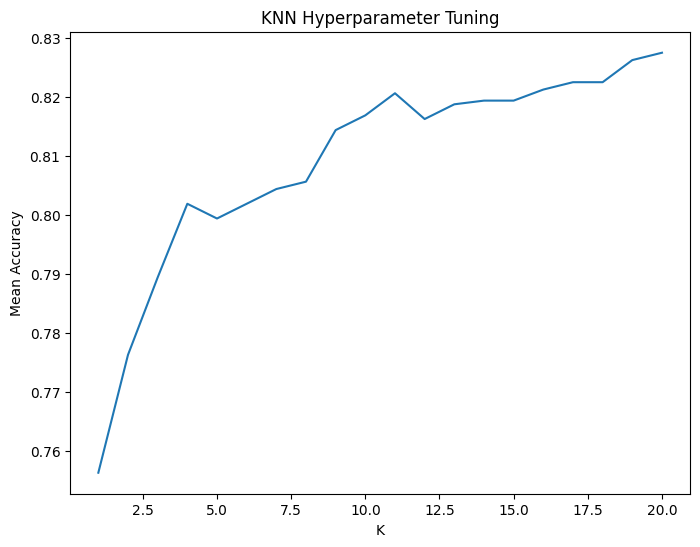

In [ ]:
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Best value of K: {best_k}')

k_values = range(1, 21)
test_scores = [grid_search.cv_results_['mean_test_score'][i] for i in range(len(k_values))]

plt.figure(figsize=(8, 6))
plt.plot(k_values, test_scores)
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

The image illustrates the process of tuning the hyperparameter K in the K-Nearest Neighbors (KNN) algorithm using GridsearchCV. Here are the key takeaways:

### **1. KNN Hyperparameter Tuning:**  
The x-axis represents different values of K (number of neighbors).  
The y-axis shows the mean accuracy achieved by the KNN model.  
As K increases, the mean accuracy initially improves and then stabilizes.  
The best K value (highlighted) is around 20.  

### **2. Influence of K on Prediction Performance:**  

**Smaller K (e.g., 1 or 3) leads to overfitting:**  
The model captures noise and local variations.  
High sensitivity to outliers.  

**Larger K (e.g., 20 or more) results in underfitting:**  
The model becomes too generalized.
May miss important patterns.  

**Balancing Act:**
Choose an optimal K based on the trade-off between bias and variance.  
Cross-validation helps find the sweet spot.  
Remember that K significantly impacts the KNN model’s performance, and selecting the right value is crucial for achieving accurate predictions.